In [ ]:
train_path = '/content/drive/MyDrive/Potholes/Potholes detection/train'    #Mounting train and test data
valid_path = '/content/drive/MyDrive/Potholes/Potholes detection/test'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
img=image.load_img("/content/drive/MyDrive/Potholes/Potholes detection/train/potholes/5.jpg")

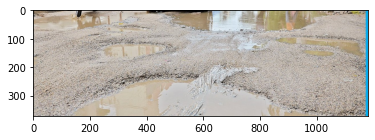

In [ ]:
plt.imshow(img)

In [ ]:
import cv2

In [ ]:
cv2.imread("/content/drive/MyDrive/Potholes/Potholes detection/train/potholes/5.jpg").shape

(372, 1181, 3)

In [ ]:
train_datagen=image.ImageDataGenerator(
rescale=0.1/255,
)
test_dataset=image.ImageDataGenerator(
rescale=0.1/255,
)

In [ ]:
train_set=train_datagen.flow_from_directory(                               # checking train set images belongs to classes and given perticular size to the imgaes
'/content/drive/MyDrive/Potholes/Potholes detection/train',
target_size=(224,224),
batch_size=32,
class_mode='binary'
)

Found 1651 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'No potholes': 0, 'potholes': 1}

In [ ]:
train_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_set=test_dataset.flow_from_directory(                                                # checking train set images belongs to classes and given perticular size to the imgaes
'/content/drive/MyDrive/Potholes/Potholes detection/test',
target_size=(224,224),
batch_size=32,
class_mode='binary'
)

Found 94 images belonging to 2 classes.


In [ ]:
#CNN based model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
loss=keras.losses.binary_crossentropy,
metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
c=model.fit_generator(
train_set,
epochs=10,
validation_data=test_set
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
52/52 [==============================] - 354s 7s/step - loss: 0.6945 - accuracy: 0.5094 - val_loss: 0.6813 - val_accuracy: 0.6702
Epoch 2/10
52/52 [==============================] - 14s 263ms/step - loss: 0.6385 - accuracy: 0.5936 - val_loss: 0.5805 - val_accuracy: 0.7340
Epoch 3/10
52/52 [==============================] - 14s 264ms/step - loss: 0.3896 - accuracy: 0.8353 - val_loss: 0.3981 - val_accuracy: 0.8191
Epoch 4/10
52/52 [==============================] - 14s 260ms/step - loss: 0.2850 - accuracy: 0.8964 - val_loss: 0.2587 - val_accuracy: 0.8936
Epoch 5/10
52/52 [==============================] - 14s 261ms/step - loss: 0.2538 - accuracy: 0.9079 - val_loss: 0.3388 - val_accuracy: 0.8511
Epoch 6/10
52/52 [==============================] - 14s 262ms/step - loss: 0.2306 - accuracy: 0.9158 - val_loss: 0.3793 - val_accuracy: 0.8511
Epoch 7/10
52/52 [==============================] - 14s 263ms/step - loss: 0.2098 - accuracy: 0.9249 - val_loss: 0.2419 - val_accuracy: 0.9149
E

In [ ]:
loss,accuracy=model.evaluate(test_set)                           #Accuracy and losss for test data 
print("Accuracy is :",accuracy*100)

3/3 [==============================] - 1s 396ms/step - loss: 0.2648 - accuracy: 0.9043
Accuracy is : 90.42553305625916


In [ ]:
loss,accuracy=model.evaluate(train_set)                           #Accuracy and losss for train data 
print("Accuracy is :",accuracy*100)

52/52 [==============================] - 8s 159ms/step - loss: 0.1530 - accuracy: 0.9400
Accuracy is : 94.00363564491272


In [ ]:
model.save('Fi_Potholes_detection.h5') 